Implement Take and Grant model, create different functions for all the operations and show how this model can be attacked.

In [8]:
#this function creates subjects/objects and updates the graph tgm
def create_subject(sfrom, sto, rights, subjects, tgm):
    if sfrom not in subjects:
        print("This subject does not exist")
        return
    if sto in subjects:
        print("Subject already exists")
        return
    subjects[sto] = len(subjects)
    tgm[subjects[sfrom]].append(rights)
    for i in range(0, len(tgm)):
        if i != subjects[sfrom]:
            tgm[i].append('')
    new_row = ['']*len(tgm[0])
    tgm.append(new_row)
    print(tgm)

#this function demonstrates take operation
def take(who,rights,to, afrom, subjects, tgm):
    if who not in subjects or afrom not in subjects or to not in subjects:
        print("Subject/object does not exist")
        return
    if tgm[subjects[who]][subjects[afrom]].find('t') != -1:
        if tgm[subjects[afrom]][subjects[to]].find(rights) != -1:
            tgm[subjects[who]][subjects[to]] = rights
        else:
            print("These rights does not exist")
            return
    else:
        print(who, "has not take access on ",afrom)
    print(tgm)

#this function demonstrates grant operation
def grants(who,rights,to, afrom,subjects,tgm):
    if who not in subjects or afrom not in subjects or to not in subjects:
        print("Subject/object does not exist")
        return
    if tgm[subjects[who]][subjects[to]].find('g') != -1:
        if tgm[subjects[who]][subjects[afrom]].find(rights) != -1:
            tgm[subjects[to]][subjects[afrom]] = rights
        else:
            print("These rights does not exist")
            return
    else:
        print(who, "has not grant access on ",to)
    print(tgm)

#this function demonstrates read operation
def read(afrom, to, tgm, subjects):
    if tgm[subjects[afrom]][subjects[to]].find('r') != -1:
        to = to + ".txt"
        f = open(to, "r")
        print("File Data:")
        print(f.read())
        f.close()
        print("Closed file...")
    else:
        print("No read access")
        
#this function demonstrates write operation
def write(afrom, to, tgm, subjects):
    if tgm[subjects[afrom]][subjects[to]].find('w') != -1:
        to = to + ".txt"
        f = open(to, "a")
        data = input("File Data:")
        f.write(data)
        f.close()
        print("Data written and file closed successfully.")
    else:
        print(afrom,"does not have write permissions to",to)

#Adjacency Matrix of Take-grant graph
tgm = [['', '', ''], ['t', '', 'rw'], ['', '', '']]
#set of subjects & objects
subjects = {"A":0,"B":1, "C":2}
print(" /objects: ",subjects)
create_subject("A", "V",'t,g',subjects, tgm)
print("Subjects/objects: ",subjects)
print("B takes g to V from A")
take("B","g","V","A",subjects, tgm)
print("B grants to V the X to C")
grants("B","r","V","C",subjects,tgm)

#now let us call some read write operations
print("----------------------------")
print("B wants to read from File C")
read("B","C",tgm, subjects)
print("A wants to read from File C")
read("A", "C", tgm, subjects)
print("-----------------------------------\nA has no read access to file C. Lets launch the attack")
print("Lets Attack using concept of 'Non-Selectivity of Adminstrative Rights'")
#A takes r to C from V
print("A takes r to C from V")
take("A","r","C","V",subjects, tgm)
print("Lets repeat this and see the result\nA wants to read from File C")
read("A", "C", tgm, subjects)
print("Now A can read data from C. Earliar A was unable to read from C")
print("----------------------------\nPerform write operation")
print("A wants to write to File C")
write("A", "C", tgm, subjects)
print("B wants to write to File C")
write("B", "C", tgm, subjects)

 /objects:  {'A': 0, 'B': 1, 'C': 2}
[['', '', '', 't,g'], ['t', '', 'rw', ''], ['', '', '', ''], ['', '', '', '']]
Subjects/objects:  {'A': 0, 'B': 1, 'C': 2, 'V': 3}
B takes g to V from A
[['', '', '', 't,g'], ['t', '', 'rw', 'g'], ['', '', '', ''], ['', '', '', '']]
B grants to V the X to C
[['', '', '', 't,g'], ['t', '', 'rw', 'g'], ['', '', '', ''], ['', '', 'r', '']]
----------------------------
B wants to read from File C
File Data:
Amount: 26460
Name: Anuja Dumada
Closed file...
A wants to read from File C
No read access
-----------------------------------
A has no read access to file C. Lets launch the attack
Lets Attack using concept of 'Non-Selectivity of Adminstrative Rights'
A takes r to C from V
[['', '', 'r', 't,g'], ['t', '', 'rw', 'g'], ['', '', '', ''], ['', '', 'r', '']]
Lets repeat this and see the result
A wants to read from File C
File Data:
Amount: 26460
Name: Anuja Dumada
Closed file...
Now A can read data from C. Earliar A was unable to read from C
------------

Initial Graph state
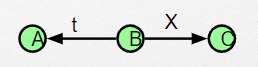

Final Graph state(After performing all operations)
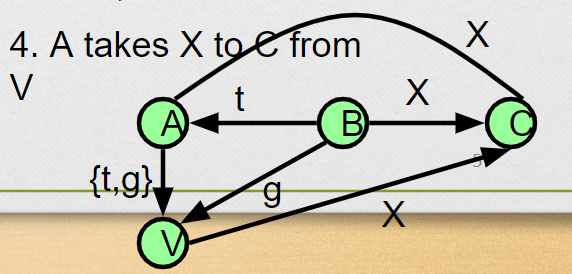
